In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_indexes(id_def,defi):
    indexes = []
    for i,d, in enumerate(id_def):
        if d == defi:
            indexes.append(i)
    return indexes

In [5]:
def error_finder(indexes,pred,label,funcs):
    corrects = []   
    incorrects = []
    
    for idx in indexes:
        predictions = pred[idx]
        labels =label[idx]
        functionalities = funcs[idx]
        
        cor = []
        incor = []        
        for j,(p,l) in enumerate(zip(predictions,labels)):
            if p == l:
                cor.append(functionalities[j])
            else:
                incor.append(functionalities[j])
                
        corrects.append(cor)
        incorrects.append(incor)

    return corrects, incorrects
            

In [6]:
def count_errors(list_of_fun):
    Misleading_NHS = ['counter_ref_nh','negate_neg_nh','counter_quote_nh','target_indiv_nh','target_group_nh','slur_reclaimed_nh','slur_homonym_nh']
    Leet_HS = ['spell_leet_h','spell_char_swap_h','spell_space_add_h','spell_char_del_h','spell_space_del_h']
    Special_HS = ['derog_impl_h','ref_subs_clause_h','phrase_question_h','phrase_opinion_h']
    HS = ['derog_dehum_h','derog_neg_attrib_h','threat_dir_h','negate_pos_h','derog_neg_emote_h','slur_h','ref_subs_sent_h','threat_norm_h','profanity_h']
    NHS = ['ident_pos_nh','ident_neutral_nh','profanity_nh','target_obj_nh']

    dictionary = {
        'Misleading_NHS': 0,
        'Leet_HS': 0,
        'Special_HS': 0,
        'HS': 0,
        'NHS': 0
    }
    
    for lista in list_of_fun:
        for fun in lista:
            if fun in Misleading_NHS:
                dictionary['Misleading_NHS']+=1
            elif fun in Leet_HS:
                dictionary['Leet_HS']+=1
            elif fun in Special_HS:
                dictionary['Special_HS'] += 1
            elif fun in HS:
                dictionary['HS']+=1
            elif fun in NHS:
                dictionary['NHS'] +=1

                
    for key in dictionary:
        dictionary[key] = round(dictionary[key] / 3, 2)

    return dictionary

In [7]:
def plot_graph(correct, incorrect, defi):
    # Labels for the bars
    categories = list(correct.keys())
    
    # Correct and incorrect values
    correct_values = list(correct.values())
    incorrect_values = list(incorrect.values())
    
    # Bar width
    bar_width = 0.35
    
    # Set positions for the bars
    index = np.arange(len(categories))
    
    # Create a bar chart with enhanced quality
    fig, ax = plt.subplots(figsize=(8, 6))  # Smaller size
    
    # Plot the bars
    bar1 = ax.bar(index, correct_values, bar_width, label='Correct', color='#4CAF50', edgecolor='black', linewidth=1.5)
    bar2 = ax.bar(index + bar_width, incorrect_values, bar_width, label='Incorrect', color='#F44336', edgecolor='black', linewidth=1.5)
    
    # Add labels and title with better formatting
    ax.set_xlabel('Errors', fontsize=14, fontweight='bold')
    ax.set_title(f"Error distribution per Macro Class with {defi}", fontsize=16)
    
    # Customize x-ticks
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories, rotation=0, ha='center', fontsize=12)
    
    # Customize y-axis
    ax.set_ylim(0, max(max(correct_values), max(incorrect_values)) * 1.1)  # Add some space above the bars
    ax.tick_params(axis='y', labelsize=12)
    
    # Add the numbers on top of each bar
    for i, (bar, value) in enumerate(zip(bar1, correct_values)):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(int(value)), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    for i, (bar, value) in enumerate(zip(bar2, incorrect_values)):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(int(value)), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add a legend with enhanced styling
    ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
    
    # Add grid lines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Tighter layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [8]:
model = 'Mistral' #LLama3 - Mistral - Flant5
ds = 'HC' #HC - FtW - mhs
step = '1' # 1 - 2


root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'

df = pd.read_csv(str(csv_file_path))

# Read the CSV file into a DataFrame
id_def = df['ID_def'].tolist()
Inputs_lists = df['Input'].apply(eval).tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()
Functions_list = df['functionality'].apply(eval).tolist()



In [9]:
model = 'Mistral' #LLama3 - Mistral - Flant5
ds = 'HC' #HC - FtW - mhs
step = '1' # 1 - 2


root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'

df = pd.read_csv(str(csv_file_path))

# Read the CSV file into a DataFrame
id_def = df['ID_def'].tolist()
Inputs_lists = df['Input'].apply(eval).tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()
if model == 'Flant5':
    Functions_list = df['Functionality'].apply(eval).tolist()
else: 
    Functions_list = df['functionality'].apply(eval).tolist()
    
id_deff = ['NO','HateCheck','OL','HSB','HSB_EDFoC', 'HSB_EDPC','HSB_EDT', 'HSB_EDFoC_EDT', 'HSB_EDFoC_EDPC', 'HSB_EDT_EDPC','HSB_EDFoC_EDPC_EDT']

list_of_dict = []

for defi in id_deff:
    indexes = get_indexes(id_def,defi)
    corrects, incorrects = error_finder(indexes,Predictions_list,Labels_list,Functions_list)
    incorrect_counts = count_errors(incorrects)
    list_of_dict.append(incorrect_counts)

step = '2' # 1 - 2


root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'

df = pd.read_csv(str(csv_file_path))

# Read the CSV file into a DataFrame
id_def = df['ID_def'].tolist()
Inputs_lists = df['Input'].apply(eval).tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()
if model == 'Flant5':
    Functions_list = df['Functionality'].apply(eval).tolist()
else: 
    Functions_list = df['functionality'].apply(eval).tolist()


if model == 'Mistral':
    id_deff = ['HSB_LAA', 'HSB_LAA_PI', 'HSB_LAA_Exc', 'HSB_LAA_IHS', 'HSB_LAA_PI_Exc', 'HSB_LAA_Exc_IHS', 'HSB_LAA_PI_IHS', 'HSB_LAA_PI_IHS_Exc']

else:
    id_deff = ['HSB_EDT_LAA', 'HSB_EDT_LAA_PI', 'HSB_EDT_LAA_Exc', 'HSB_EDT_LAA_IHS', 'HSB_EDT_LAA_PI_Exc', 'HSB_EDT_LAA_Exc_IHS', 'HSB_EDT_LAA_PI_IHS', 'HSB_EDT_LAA_PI_IHS_Exc']



for defi in id_deff:
    indexes = get_indexes(id_def,defi)
    corrects, incorrects = error_finder(indexes,Predictions_list,Labels_list,Functions_list)
    incorrect_counts = count_errors(incorrects)
    list_of_dict.append(incorrect_counts)

    

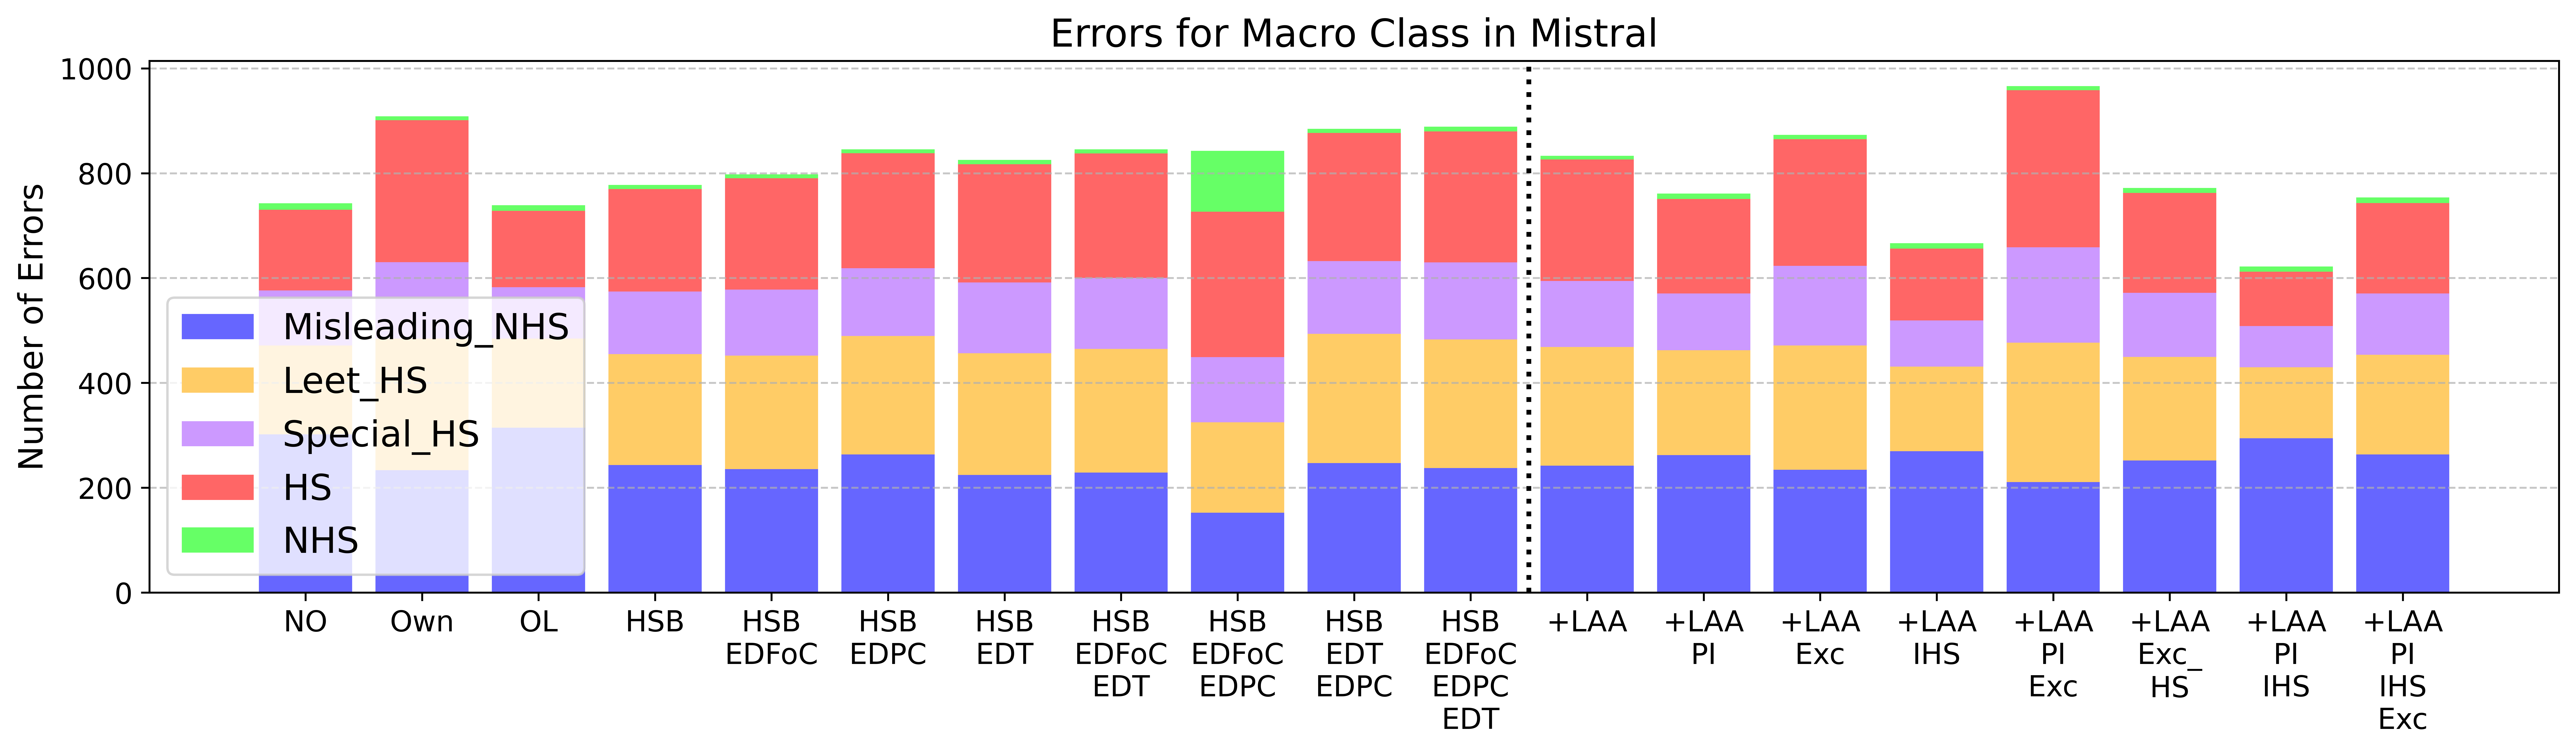

In [10]:
id_deff = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC','HSB\nEDFoC\nEDPC\nEDT',"+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc","+LAA\nExc_\nHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]

# Extract keys (conditions) and values
days = np.arange(len(list_of_dict))  # X-axis values
categories = list_of_dict[0].keys()  # All error categories

# Define custom colors
colors = {
    "HS": "#FF6666",  # Darker red from \highlightred
    "NHS": "#66FF66",  # Green from \highlightgreen
    "Leet_HS": "#FFCC66",  # Orange from \highlightorange
    "Misleading_NHS": "#6666FF",  # Darker blue from \highlightblue
    "Special_HS": "#CC99FF"  # Violet from \highlightviolet
}
# Stack the bar chart
y_offset = np.zeros(len(list_of_dict))
fig, ax = plt.subplots(figsize=(18, 4),dpi=800)  # Enhanced quality

for category in categories:
    values = [d[category] for d in list_of_dict]
    ax.bar(id_deff, values, bottom=y_offset, label=category, color=colors.get(category, "gray"))
    y_offset += np.array(values)

ax.axvline(x=10.5, color='black', linestyle=':', linewidth=2)  # 10.5 corresponds to the space between 11th and 12th bars

# Labels and legend
ax.set_ylabel("Number of Errors", fontsize=14)
ax.set_title(f"Errors for Macro Class in {model}", fontsize=16)
ax.legend(fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(f"../Figures/Errors_MacroClasses_{model}.pdf", bbox_inches='tight')
plt.show()